In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt
from rdkit.Chem import rdDepictor
rdDepictor.SetPreferCoordGen(True)
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.molSize = (350, 350)
IPythonConsole.drawOptions.addAtomIndices = True
from openchemie import OpenChemIE
from PIL import Image
import numpy as np
from rdkit.Chem import AllChem
import cv2
import re
import torch
from openchemie import utils

import json

/Mounts/rbg-storage1/users/urop/vincentf/miniconda3/envs/openchemie/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = OpenChemIE(device = torch.device('cuda'))

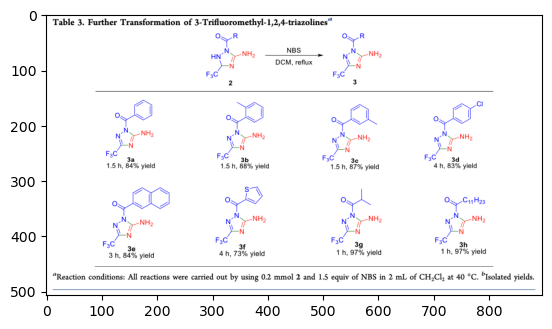

In [3]:
file_name = 'acs.joc.2c00176 example 2.png'

image_file = '../data/' + file_name

image = Image.open(image_file)

image_np = np.array(image)

plt.imshow(image_np)
plt.show()

In [4]:
results = model.extract_reactions_from_figures([image_np])

coref_results = model.extract_molecule_corefs_from_figures([image_np])

/Mounts/rbg-storage1/users/urop/vincentf/miniconda3/envs/openchemie/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Mounts/rbg-storage1/users/urop/vincentf/miniconda3/envs/openchemie/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/Mounts/rbg-storage1/users/urop/vincentf/miniconda3/envs/openchemie/lib/python3.9/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATe

Inspect the RxnScribe Outputs

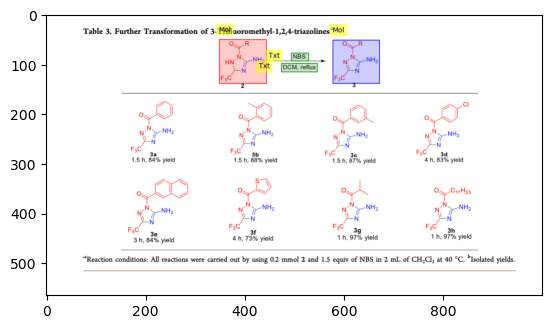

In [5]:
output = model.rxnscribe.draw_predictions(results[0]['reactions'], image_file = image_file)
plt.imshow(output[0])

{'Nc1nc(C(F)(F)F)nn1C(=O)c1ccc2ccccc2c1': ['D', '3e', '3 h, 84% yield'], 'Nc1nc(C(F)(F)F)nn1C(=O)c1ccccc1': ['3a', '1.5 h, 84% yield'], '*C(=O)N1NC(C(F)(F)F)N=C1N': ['2'], 'Nc1nc(C(F)(F)F)nn1C(=O)c1cccs1': ['3f', '4 h, 73% yield'], 'Cc1ccccc1C(=O)n1nc(C(F)(F)F)nc1N': ['J_', '3b', '1,5 h, 88% yield'], 'Cc1cccc(C(=O)n2nc(C(F)(F)F)nc2N)c1': ['U', '3c', '1.5 h, 87% yield'], 'CC(C)C(=O)n1nc(C(F)(F)F)nc1N': ['1h, 97% yield'], '*C(=O)n1nc(C(F)(F)F)nc1N': ['3'], 'Nc1nc(C(F)(F)F)nn1C(=O)c1ccc(Cl)cc1': ['5', '3d', '4 h, 83% yleld'], '[CH2]C#CC#CC#CC#CC#CC#CC#CC#CC(=O)n1nc(C(F)(F)F)nc1N': ['3~', '3h', '1h, 97% yield']}


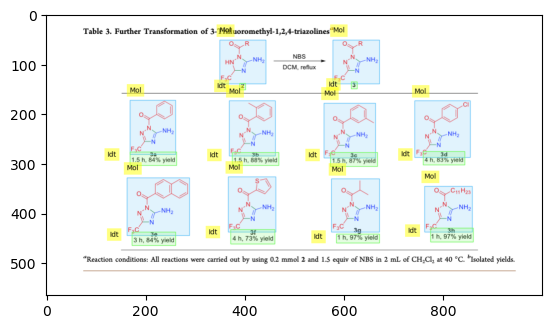

In [6]:
coref_output = model.moldet.draw_bboxes(coref_results[0], image_file = image_file, coref = True)

plt.imshow(coref_output[0])

coref_results_dict = {coref_results[0]['bboxes'][coref[0]]['smiles']: coref_results[0]['bboxes'][coref[1]]['text']  for coref in coref_results[0]['corefs']}

print(coref_results_dict)

*C(=O)N1NC(C(F)(F)F)N=C1N


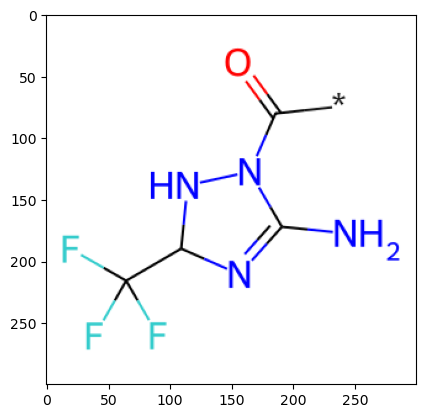

*C(=O)n1nc(C(F)(F)F)nc1N


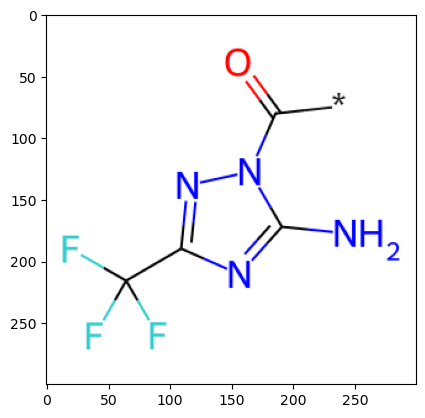

In [13]:
reactants_array = []
products = []

for reactant in results[0]['reactions'][0]['reactants']:
    print(reactant['smiles'])
    reactants_array.append(reactant['smiles'])
    i = Draw.MolToImage(Chem.MolFromSmiles(reactant['smiles']))
    plt.imshow(i)
    plt.show()
for product in results[0]['reactions'][0]['products']:
    print(product['smiles'])
    products.append(product['smiles'])
    i = Draw.MolToImage(Chem.MolFromSmiles(product['smiles']))
    plt.imshow(i)
    plt.show()

backout the reactants and do manual evaluation

In [14]:
backed_out = utils.backout(results, coref_results)

these are the predicted reactants corresponding the product with label 3e
NC1=NC(C(F)(F)F)NN1C(=O)c1ccc2ccccc2c1


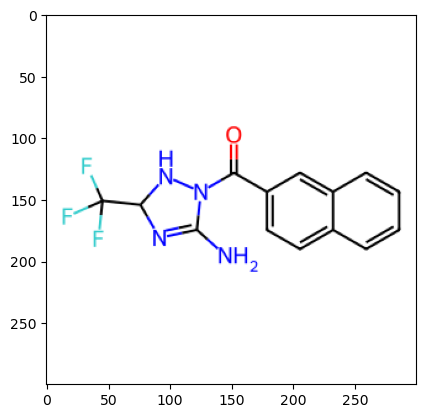

these are the predicted reactants corresponding the product with label 3a
NC1=NC(C(F)(F)F)NN1C(=O)c1ccccc1


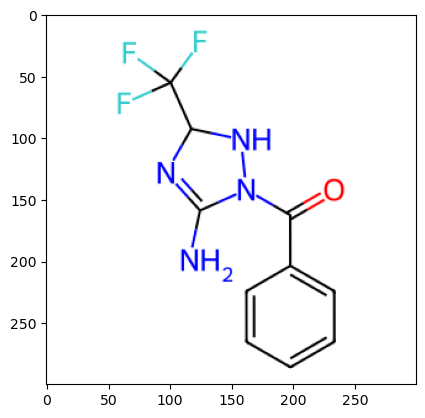

these are the predicted reactants corresponding the product with label 3f
NC1=NC(C(F)(F)F)NN1C(=O)c1cccs1


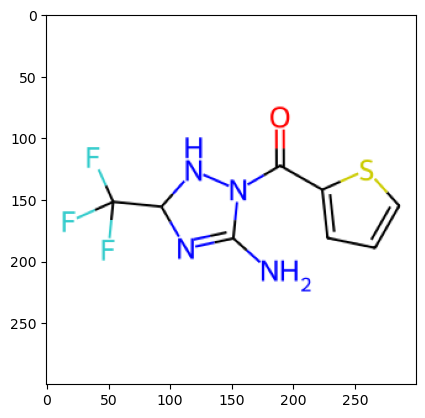

these are the predicted reactants corresponding the product with label 3b
Cc1ccccc1C(=O)N1NC(C(F)(F)F)N=C1N


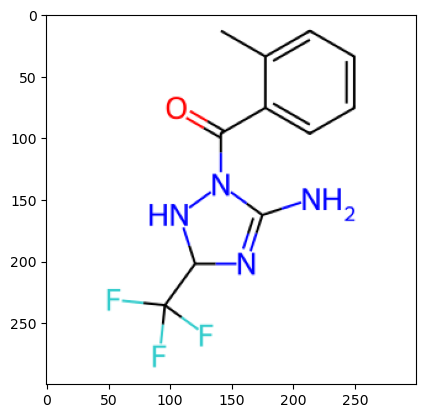

these are the predicted reactants corresponding the product with label 3c
Cc1cccc(C(=O)N2NC(C(F)(F)F)N=C2N)c1


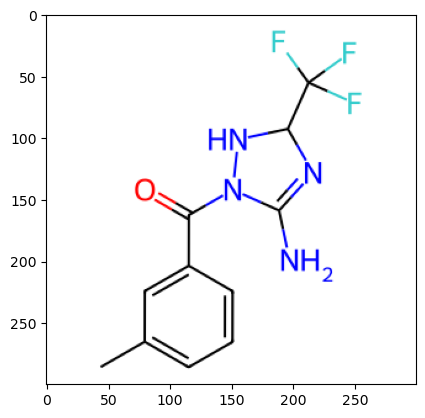

these are the predicted reactants corresponding the product with label 3d
NC1=NC(C(F)(F)F)NN1C(=O)c1ccc(Cl)cc1


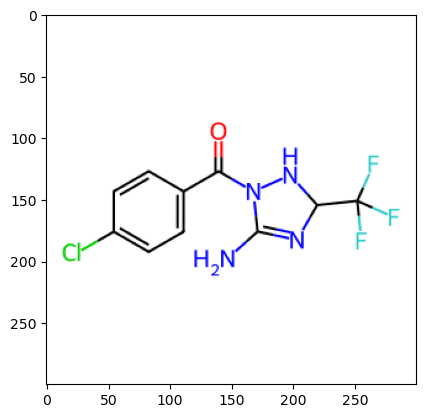

these are the predicted reactants corresponding the product with label 3h
[CH2]C#CC#CC#CC#CC#CC#CC#CC#CC(=O)N1NC(C(F)(F)F)N=C1N


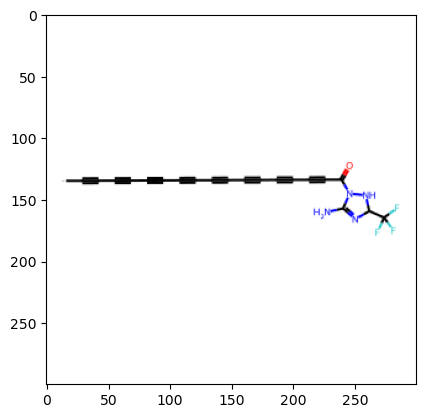

In [15]:
extracted_reactants = {}

for reactants, _, label in backed_out:
    print(f'these are the predicted reactants corresponding the product with label {label}')
    extracted_reactants[label] = []
    for molecule in reactants:
        print(molecule)
        extracted_reactants[label].append(molecule)
        i = Draw.MolToImage(Chem.MolFromSmiles(molecule))
        plt.imshow(i)
        plt.show()

backout results:

3a yes
3b yes
3c yes
3d yes
3e yes
3f yes
3g 
3h molscribe error

precision: 6/8 recall: 6/7